In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import researchpy as rp


import seaborn as sns
from copy import deepcopy

import itertools
from collections.abc import Iterable

import traceback

sns.set_style("darkgrid")

pd.set_option('max_columns', 50)

import warnings

warnings.filterwarnings('ignore')

In [2]:
def flatten_list(l):
    
    def flatten(l):
        for el in l:
            if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
                yield from flatten(el)
            else:
                yield el
                
    flat_l = flatten(l)
    
    return list(flat_l)

In [3]:
def get_relevant_columns_by_config(config, dataframe):
    try:
        if config['i_net_nas'] == False:
            config.pop('i_net_nas_trials')
    except:
        pass
    
    for key, value in config.items():
        try:
            if isinstance(value, list):
                if isinstance(value[0], str):
                    dataframe_string_query = key + ' == "' + str(value[0]) + '"'
                    for dataframe_string in value[1:]:
                        dataframe_string_query += ' | ' + key + ' == "' + str(dataframe_string) + '"'

                    dataframe = dataframe.query(dataframe_string_query)
                else:
                    dataframe = dataframe[dataframe[key].isin(value)]
                    
            else:
                dataframe = dataframe[dataframe[key] == value]
        except:
            traceback.print_exc()
        
    return dataframe


In [4]:
def plot_results(data_reduced, col, x, y, hue, plot_type=sns.barplot, aspect=1.5, col_wrap=2):
    
    #sns.set(rc={'figure.figsize':(20,10)})
    
    g = sns.FacetGrid(data_reduced, 
                      col=col,
                      ##hue='scores_type', 
                      #height=5, 
                      col_wrap=col_wrap,
                      aspect=aspect,
                      ##legend_out=False,
                     )    
    indexes = np.unique(data_reduced[hue], return_index=True)[1]
    hue_order = [data_reduced[hue].values[index] for index in sorted(indexes)]
        
    g.map(plot_type, 
          x, 
          y, 
          hue,
          hue_order=hue_order,#np.unique(data_reduced[hue]),
          ##figsize=(20,10),
          palette=sns.color_palette(),#'colorblind'
          #order=data_reduced[order_columnname],
          ##order=np.unique(results_summary_reduced_accuracy_plot["scores_type"]),
         )
    g.add_legend(fontsize=12,
               ncol=3,
               bbox_to_anchor=(0.5, -0.025),
               borderaxespad=0)    
    
    return plt.gcf()

In [5]:
#results_complete = pd.read_csv('./results_complete.csv', delimiter=';')
#results_complete = results_complete[results_complete['i_net_nas'] == True]
#results_complete_columns = list(results_complete.columns)

#results_summary = pd.read_csv('./results_summary-TEST.csv', delimiter=';')
results_summary = pd.read_csv('./results_summary-Copy1.csv', delimiter=';')
#results_summary = results_summary[results_summary['i_net_nas'] == True]
results_summary_columns = list(results_summary.columns)
results_summary['function_family_decision_sparsity'][results_summary['data_number_of_variables'] == results_summary['function_family_decision_sparsity']] = -1


results_summary.head(5)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_use_distribution_list,data_random_parameters_distribution,data_max_distributions_per_class,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_distribution_list,data_distribution_list_eval,data_objective,...,max_distance_to_neuron_average_Brest Cancer Wisconsin,max_distance_to_neuron_average_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_average_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_average_Abalone,max_distance_to_neuron_average_Car,max_distance_to_neuron_average_train,max_distance_to_neuron_average_valid,max_distance_to_neuron_average_test,max_distance_to_neuron_min_Adult,max_distance_to_neuron_min_Titanic,max_distance_to_neuron_min_Absenteeism,max_distance_to_neuron_min_Loan House,max_distance_to_neuron_min_Loan Credit,max_distance_to_neuron_min_Medical Insurance,max_distance_to_neuron_min_Bank Marketing,max_distance_to_neuron_min_Cervical Cancer,max_distance_to_neuron_min_Brest Cancer Wisconsin,max_distance_to_neuron_min_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_min_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_min_Abalone,max_distance_to_neuron_min_Car,max_distance_to_neuron_min_train,max_distance_to_neuron_min_valid,max_distance_to_neuron_min_test,Unnamed: 1084
0,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,False,True,True,False,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,4.019083,5.327211,2.372763,2.630432,2.686399,3.110356,3.155145,3.827475,4.933537,0.975198,0.207144,0.327737,3.221417,4.835405,3.947753,1.395832,2.761705,2.954098,0.542193,1.370413,1.550567,0.0,1.759403,2.376648,NaN
1,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,True,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.348908,6.149862,4.694660,4.758613,4.727695,5.341643,6.979021,6.257294,4.968286,1.048408,0.283473,0.397386,3.215648,5.251742,4.292603,1.395832,3.063497,2.999799,0.601625,1.402580,1.570592,0.0,3.929848,3.396708,NaN
2,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,False,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.025986,5.948582,4.130510,4.302174,4.234847,5.003368,6.410925,5.979883,4.968286,1.025592,0.305202,0.442595,3.215648,5.251742,4.292603,1.395832,2.937876,2.999799,0.601625,1.262297,1.570592,0.0,3.501382,3.287187,NaN
3,3,1,1,True,vanilla,22,456,32,2,[],True,True,1,True,False,True,True,False,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.204597,4.886233,2.584123,2.739323,2.913198,3.245789,2.882460,3.528789,4.459503,1.159254,0.251280,0.293703,10.548042,3.450844,4.944274,1.922642,3.897543,2.776858,1.044775,1.149709,1.580739,0.0,1.681609,2.332077,NaN
4,3,1,-1,True,SDT,128,128,15,2,[],True,True,1,True,True,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.348908,6.149862,4.694660,4.758613,4.727695,5.341643,6.979021,6.257294,4.968286,1.048408,0.283473,0.397386,3.215648,5.251742,4.292603,1.395832,3.063497,2.999799,0.601625,1.402580,1.570592,0.0,3.929848,3.396708,NaN


In [6]:
results_summary.head(5)

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_use_distribution_list,data_random_parameters_distribution,data_max_distributions_per_class,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_distribution_list,data_distribution_list_eval,data_objective,...,max_distance_to_neuron_average_Brest Cancer Wisconsin,max_distance_to_neuron_average_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_average_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_average_Abalone,max_distance_to_neuron_average_Car,max_distance_to_neuron_average_train,max_distance_to_neuron_average_valid,max_distance_to_neuron_average_test,max_distance_to_neuron_min_Adult,max_distance_to_neuron_min_Titanic,max_distance_to_neuron_min_Absenteeism,max_distance_to_neuron_min_Loan House,max_distance_to_neuron_min_Loan Credit,max_distance_to_neuron_min_Medical Insurance,max_distance_to_neuron_min_Bank Marketing,max_distance_to_neuron_min_Cervical Cancer,max_distance_to_neuron_min_Brest Cancer Wisconsin,max_distance_to_neuron_min_Wisconsin Diagnostic Breast Cancer,max_distance_to_neuron_min_Wisconsin Prognostic Breast Cancer,max_distance_to_neuron_min_Abalone,max_distance_to_neuron_min_Car,max_distance_to_neuron_min_train,max_distance_to_neuron_min_valid,max_distance_to_neuron_min_test,Unnamed: 1084
0,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,False,True,True,False,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,4.019083,5.327211,2.372763,2.630432,2.686399,3.110356,3.155145,3.827475,4.933537,0.975198,0.207144,0.327737,3.221417,4.835405,3.947753,1.395832,2.761705,2.954098,0.542193,1.370413,1.550567,0.0,1.759403,2.376648,NaN
1,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,True,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.348908,6.149862,4.694660,4.758613,4.727695,5.341643,6.979021,6.257294,4.968286,1.048408,0.283473,0.397386,3.215648,5.251742,4.292603,1.395832,3.063497,2.999799,0.601625,1.402580,1.570592,0.0,3.929848,3.396708,NaN
2,3,1,1,True,vanilla,22,218,15,2,[],True,True,1,True,False,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.025986,5.948582,4.130510,4.302174,4.234847,5.003368,6.410925,5.979883,4.968286,1.025592,0.305202,0.442595,3.215648,5.251742,4.292603,1.395832,2.937876,2.999799,0.601625,1.262297,1.570592,0.0,3.501382,3.287187,NaN
3,3,1,1,True,vanilla,22,456,32,2,[],True,True,1,True,False,True,True,False,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.204597,4.886233,2.584123,2.739323,2.913198,3.245789,2.882460,3.528789,4.459503,1.159254,0.251280,0.293703,10.548042,3.450844,4.944274,1.922642,3.897543,2.776858,1.044775,1.149709,1.580739,0.0,1.681609,2.332077,NaN
4,3,1,-1,True,SDT,128,128,15,2,[],True,True,1,True,True,True,False,True,vanilla,3,1,distribution,"['uniform', 'normal', 'gamma', 'beta', 'poisson']",['uniform'],classification,...,5.348908,6.149862,4.694660,4.758613,4.727695,5.341643,6.979021,6.257294,4.968286,1.048408,0.283473,0.397386,3.215648,5.251742,4.292603,1.395832,3.063497,2.999799,0.601625,1.402580,1.570592,0.0,3.929848,3.396708,NaN


In [7]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_maximum_depth_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'data_function_generation_type',
                  'data_categorical_indices',
                    
                  'data_exclude_linearly_seperable', 
                  'data_data_generation_filtering', 
                  'data_fixed_class_probability', 
                  'data_weighted_data_generation', 
                  'data_shift_distrib',
      
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_learning_rate',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'i_net_data_reshape_version',
                  'i_net_nas',
                  'i_net_nas_trials',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [8]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

results_summary_inet.head(10)

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,i_net_nas,i_net_nas_trials,...,inet_scores_soft_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_accuracy_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_f1_score_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_runtime_Brest Cancer Wisconsin_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_accuracy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_f1_score_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_runtime_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_accuracy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_f1_score_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_runtime_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Abalone_TRAIN_DATA,inet_scores_binary_crossentropy_Abalone_TRAIN_DATA,inet_scores_accuracy_Abalone_TRAIN_DATA,inet_scores_f1_score_Abalone_TRAIN_DATA,inet_scores_runtime_Abalone_TRAIN_DATA,inet_scores_soft_binary_crossentropy_Car_TRAIN_DATA,inet_scores_binary_crossentropy_Car_TRAIN_DATA,inet_scores_accuracy_Car_TRAIN_DATA,inet_scores_f1_score_Car_TRAIN_DATA,inet_scores_runtime_Car_TRAIN_DATA
0,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,False,60,...,0.612272,0.540918,0.884058,0.777778,0.125443,0.637296,0.583981,0.785714,0.400000,0.249547,0.633835,0.482652,0.842105,0.800000,0.111457,0.672332,0.644588,0.671463,0.000000,0.136833,0.666300,0.669282,0.633721,0.487805,0.141851
1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,False,60,...,0.647261,0.609216,0.855072,0.722222,0.093099,0.633631,0.581158,0.750000,0.533333,0.218647,0.711811,0.752526,0.315789,0.434783,0.092426,0.700400,0.716040,0.359712,0.327456,0.233235,0.684276,0.725136,0.633721,0.487805,0.110451
2,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,False,60,...,0.616104,0.544043,0.956522,0.930233,0.235220,0.653263,0.633200,0.678571,0.437500,0.178035,0.646999,0.559191,0.684211,0.666667,0.175921,0.710094,0.740391,0.316547,0.473198,0.121447,0.634633,0.614505,0.726744,0.598291,0.134229
3,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,False,60,...,0.683018,0.672640,0.898551,0.810811,0.130453,0.684191,0.674247,0.732143,0.347826,0.239125,0.694934,0.696857,0.315789,0.480000,0.229034,0.689169,0.682483,0.678657,0.000000,0.131953,0.683633,0.675008,0.656977,0.458716,0.172724
4,3,-1,SDT,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,1,None,False,60,...,0.451958,0.264256,0.956522,0.933333,0.188224,0.464692,0.294074,0.892857,0.769231,0.

In [9]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten_list([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten_list([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])
results_summary_inet.insert(0, 'technique', ['inet' for _ in range(results_summary_inet.shape[0])])

    
print(results_summary_inet.shape)
results_summary_inet.head(20)

(11, 189)


,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,...,soft_binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,binary_crossentropy_Brest Cancer Wisconsin_TRAIN_DATA,accuracy_Brest Cancer Wisconsin_TRAIN_DATA,f1_score_Brest Cancer Wisconsin_TRAIN_DATA,runtime_Brest Cancer Wisconsin_TRAIN_DATA,soft_binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,binary_crossentropy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,accuracy_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,f1_score_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,runtime_Wisconsin Diagnostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,binary_crossentropy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,accuracy_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,f1_score_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,runtime_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_Abalone_TRAIN_DATA,binary_crossentropy_Abalone_TRAIN_DATA,accuracy_Abalone_TRAIN_DATA,f1_score_Abalone_TRAIN_DATA,runtime_Abalone_TRAIN_DATA,soft_binary_crossentropy_Car_TRAIN_DATA,binary_crossentropy_Car_TRAIN_DATA,accuracy_Car_TRAIN_DATA,f1_score_Car_TRAIN_DATA,runtime_Car_TRAIN_DATA
0,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.612272,0.540918,0.884058,0.777778,0.125443,0.637296,0.583981,0.785714,0.400000,0.249547,0.633835,0.482652,0.842105,0.800000,0.111457,0.672332,0.644588,0.671463,0.000000,0.136833,0.666300,0.669282,0.633721,0.487805,0.141851
1,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.647261,0.609216,0.855072,0.722222,0.093099,0.633631,0.581158,0.750000,0.533333,0.218647,0.711811,0.752526,0.315789,0.434783,0.092426,0.700400,0.716040,0.359712,0.327456,0.233235,0.684276,0.725136,0.633721,0.487805,0.110451
2,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.616104,0.544043,0.956522,0.930233,0.235220,0.653263,0.633200,0.678571,0.437500,0.178035,0.646999,0.559191,0.684211,0.666667,0.175921,0.710094,0.740391,0.316547,0.473198,0.121447,0.634633,0.614505,0.726744,0.598291,0.134229
3,inet,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.683018,0.672640,0.898551,0.810811,0.130453,0.684191,0.674247,0.732143,0.347826,0.239125,0.694934,0.696857,0.315789,0.480000,0.229034,0.689169,0.682483,0.678657,0.000000,0.131953,0.683633,0.675008,0.656977,0.458716,0.172724
4,inet,SDT-1,3,-1,SDT,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,1,None,...,0.451958,0.264256,0.956522,0.933333,0.188224,0.464692,0.294074,0.892857,0.769231,0.121917,0.640491,0.511439,0.736842,0.705882,0.186092,0.615761,0.737195,0.752998,0.397661,0.108876,0.445432,0.410450,0.872093,0.845070,0.195864
5,inet,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.

In [10]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten_list([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten_list([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'dt_type', [dt_type + str(decision_sparsity) for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])
results_summary_dt_distilled.insert(0, 'technique', ['distilled' for _ in range(results_summary_dt_distilled.shape[0])])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled.head(15)


(11, 431)


,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,...,f1_score_uniform_Abalone_TRAIN_DATA,runtime_uniform_Abalone_TRAIN_DATA,soft_binary_crossentropy_Abalone_TRAIN_DATA,binary_crossentropy_Abalone_TRAIN_DATA,accuracy_Abalone_TRAIN_DATA,f1_score_Abalone_TRAIN_DATA,soft_binary_crossentropy_std_Abalone_TRAIN_DATA,binary_crossentropy_std_Abalone_TRAIN_DATA,accuracy_std_Abalone_TRAIN_DATA,f1_score_std_Abalone_TRAIN_DATA,runtime_Abalone_TRAIN_DATA,soft_binary_crossentropy_uniform_Car_TRAIN_DATA,binary_crossentropy_uniform_Car_TRAIN_DATA,accuracy_uniform_Car_TRAIN_DATA,f1_score_uniform_Car_TRAIN_DATA,runtime_uniform_Car_TRAIN_DATA,soft_binary_crossentropy_Car_TRAIN_DATA,binary_crossentropy_Car_TRAIN_DATA,accuracy_Car_TRAIN_DATA,f1_score_Car_TRAIN_DATA,soft_binary_crossentropy_std_Car_TRAIN_DATA,binary_crossentropy_std_Car_TRAIN_DATA,accuracy_std_Car_TRAIN_DATA,f1_score_std_Car_TRAIN_DATA,runtime_Car_TRAIN_DATA
0,distilled,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.789644,0.005745,0.568331,0.349863,0.844125,0.789644,0.0,0.0,0.0,0.0,0.005745,0.410779,0.204375,0.895349,0.869565,0.001028,0.410779,0.204375,0.895349,0.869565,0.0,0.0,0.0,0.0,0.001028
1,distilled,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.789644,0.006056,0.568331,0.349863,0.844125,0.789644,0.0,0.0,0.0,0.0,0.006056,0.410779,0.204375,0.895349,0.869565,0.000922,0.410779,0.204375,0.895349,0.869565,0.0,0.0,0.0,0.0,0.000922
2,distilled,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.789644,0.006106,0.568331,0.349863,0.844125,0.789644,0.0,0.0,0.0,0.0,0.006106,0.410779,0.204375,0.895349,0.869565,0.001183,0.410779,0.204375,0.895349,0.869565,0.0,0.0,0.0,0.0,0.001183
3,distilled,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.805369,0.006393,0.567062,0.292293,0.860911,0.805369,0.0,0.0,0.0,0.0,0.006393,0.412025,0.202893,0.895349,0.869565,0.001225,0.412025,0.202893,0.895349,0.869565,0.0,0.0,0.0,0.0,0.001225
4,distilled,SDT-1,3,-1,SDT,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,1,None,...,0.812081,14.343339,0.560795,0.336733,0.865707,0.812081,0.0,0.0,0.0,0.0,14.343339,0.346447,0.081241,0.970930,0.960000,8.259897,0.346447,0.081241,0.970930,0.960000,0.0,0.0,0.0,0.0,8.259897
5,distilled,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.805369,0.007055,0.567062,0.292293,0.860911,0.805369,0.0,0.0,0.0,0.0,0.007055,0.412025,0.202893,0.895349,0.869565,0.001459,0.412025,0.202893,0.895349,0.869565,0.0,0.0,0.0,0.0,0.001459
6,distilled,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,0.805369,0.006238,0.567062,0.292

In [11]:
results_summary_inet.shape

(11, 189)

In [12]:
results_summary_dt_distilled.shape

(11, 431)

In [13]:
results_summary_reduced = pd.concat([
                                     results_summary_inet, 
                                     results_summary_dt_distilled, 
                                    ]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced.head(5)

,technique,dt_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_maximum_depth_train,data_number_of_variables,data_noise_injected_level,data_function_generation_type,data_categorical_indices,data_exclude_linearly_seperable,data_data_generation_filtering,data_fixed_class_probability,data_weighted_data_generation,data_shift_distrib,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_learning_rate,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,i_net_data_reshape_version,...,accuracy_uniform_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,f1_score_uniform_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,runtime_uniform_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_std_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,binary_crossentropy_std_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,accuracy_std_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,f1_score_std_Wisconsin Prognostic Breast Cancer_TRAIN_DATA,soft_binary_crossentropy_uniform_Abalone_TRAIN_DATA,binary_crossentropy_uniform_Abalone_TRAIN_DATA,accuracy_uniform_Abalone_TRAIN_DATA,f1_score_uniform_Abalone_TRAIN_DATA,runtime_uniform_Abalone_TRAIN_DATA,soft_binary_crossentropy_std_Abalone_TRAIN_DATA,binary_crossentropy_std_Abalone_TRAIN_DATA,accuracy_std_Abalone_TRAIN_DATA,f1_score_std_Abalone_TRAIN_DATA,soft_binary_crossentropy_uniform_Car_TRAIN_DATA,binary_crossentropy_uniform_Car_TRAIN_DATA,accuracy_uniform_Car_TRAIN_DATA,f1_score_uniform_Car_TRAIN_DATA,runtime_uniform_Car_TRAIN_DATA,soft_binary_crossentropy_std_Car_TRAIN_DATA,binary_crossentropy_std_Car_TRAIN_DATA,accuracy_std_Car_TRAIN_DATA,f1_score_std_Car_TRAIN_DATA
0,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,inet,vanilla1,3,1,vanilla,vanilla,3,15,0,distribution,[],True,False,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,inet,vanilla1,3,1,vanilla,vanilla,3,32,0,distribution,[],True,False,True,True,False,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,3,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,inet,SDT-1,3,-1,SDT,vanilla,3,15,0,distribution,[],True,True,True,False,True,[128],adam,"[1024, 1024, 256, 2048, 2048]","[0, 0, 0, 0, 0.3]",0.001,binary_crossentropy,10000,1,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
config = {
    'i_net_dense_layers': ['[1024, 1024, 256, 2048, 2048]'], #['[1792, 512, 512]'], #
    'i_net_dropout': ['[0, 0, 0, 0, 0.3]'], #['[0, 0, 0.5]'], #
    
    'i_net_loss': 'binary_crossentropy', # 'binary_crossentropy', 'soft_binary_crossentropy'
    
    'data_exclude_linearly_seperable': True,
    'data_data_generation_filtering':  True, 
    'data_fixed_class_probability':  True, 
    'data_weighted_data_generation':  False, 
    'data_shift_distrib':  True, 
    
    #'data_noise_injected_level': 0, 
    #'data_data_noise': 0,

    'i_net_nas': False, # 'True', 'False'
    'i_net_nas_trials': 20, #20, 100

    #'data_number_of_variables': [unique_value], # [10]
    'function_family_maximum_depth': [3, 4, 5], # [3, 4, 5]
}

In [15]:
score_names_list = ['valid_accuracy', 'valid_binary_crossentropy', 'valid_f1_score']
valid_scores_columns = [name for name in results_summary_reduced_columns if 'valid' in name and any([score in name for score in score_names_list])]
valid_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
valid_columns = flatten_list([valid_identifier_columns, valid_scores_columns])

valid_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
valid_scores_df = valid_scores_df[valid_columns]
valid_scores_df = valid_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
valid_scores_df.head(20)


,dt_type,data_number_of_variables,technique,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median
15,SDT-1,15,distilled,0.284412,0.277827,0.90344,0.9040,0.895565,0.896618
4,SDT-1,15,inet,0.566624,0.548588,0.76144,0.7632,0.699522,0.759153
18,SDT-1,32,distilled,0.301746,0.224442,0.90416,0.9332,0.859434,0.933614
7,SDT-1,32,inet,0.545839,0.502316,0.74904,0.7716,0.619940,0.806385
12,vanilla1,15,distilled,0.608003,0.519009,0.71720,0.7332,0.683755,0.757028
1,vanilla1,15,inet,0.631568,0.667921,0.65656,0.6668,0.543188,0.631469
17,vanilla1,32,distilled,0.776767,0.648873,0.67640,0.6776,0.642018,0.713064
6,vanilla1,32,inet,0.642726,0.675567,0.64920,0.6052,0.576540,0.597104


In [16]:
distribution_list = ['uniform']#['uniform', 'gamma', 'beta', 'poisson', 'normal']

if False:
    real_world_datasets = {
                            'Adult': 28,#65,
                            'Titanic': 9,
                            'Absenteeism': 15,
                            'Loan House': 16,#17,
                            'Loan Credit': 32,
                            'Medical Insurance': 9,#6,
                            'Bank Marketing': 29,#17,
                            'Cervical Cancer': 15,
                            'Brest Cancer Wisconsin': 9,
                            'Wisconsin Diagnostic Breast Cancer': 10,
                            'Wisconsin Prognostic Breast Cancer': 10,
                            'Abalone': 10,
                            #'Car': 21,
                           }
    real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))
elif False:
    real_world_datasets = {
                        'Adult': 28,#65,
                        'Titanic': 9,
                            'Absenteeism': 15,
                            'Loan House': 16,#17,
                            #'Loan Credit': 32,
                        'Medical Insurance': 9,#6,
                            'Bank Marketing': 29,#17,
                        'Cervical Cancer': 15,
                            'Brest Cancer Wisconsin': 9,
                            'Wisconsin Diagnostic Breast Cancer': 10,
                            #'Wisconsin Prognostic Breast Cancer': 10,
                            #'Abalone': 10,
                            ##'Car': 21,
                           }
    real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))
else:
    real_world_datasets = {
                        'Adult': 32,#28,
                        ###'Titanic': 10,#9,
                            'Absenteeism': 15,
                            'Loan House': 15,#16,
                                'Loan Credit': 32,
                        ###'Medical Insurance': 10,#9,
                            'Bank Marketing': 32,#29,
                        'Cervical Cancer': 15,
                            ###'Brest Cancer Wisconsin': 10,#9,
                            ###'Wisconsin Diagnostic Breast Cancer': 10,
                            ###'Wisconsin Prognostic Breast Cancer': 10,
                            ###'Abalone': 10,
                            ##'Car': 21,
                           }
    real_world_datasets = dict(sorted(real_world_datasets.items(), key=lambda item: item[1]))    

In [17]:
real_world_dataset_names = list(real_world_datasets.keys())
score_names_list = ['accuracy']#['accuracy', 'binary_crossentropy', 'f1_score']
real_world_scores_columns = [name for name in results_summary_reduced_columns if any([score in name for score in score_names_list]) and 'soft' not in name and any([dataset_name in name for dataset_name in real_world_dataset_names])]
real_world_identifier_columns = ['dt_type', 'data_number_of_variables', 'technique']
real_world_columns = flatten_list([real_world_identifier_columns, real_world_scores_columns])

real_world_scores_df = get_relevant_columns_by_config(config, results_summary_reduced)
real_world_scores_df = real_world_scores_df[real_world_columns]
real_world_scores_df = real_world_scores_df.sort_values(['dt_type', 'data_number_of_variables', 'technique'], ascending=[True, True, True])
#real_world_scores_df.head(20)


In [18]:
columns = flatten_list(['dt_type', 'technique', 'enumerator', 'distrib', [[real_world_dataset_name + ' ' + score_name for real_world_dataset_name in real_world_datasets.keys()] for score_name in score_names_list]])
#print(np.array(columns).shape)
#columns = np.hstack([columns for i in range(5)])
#print(np.array(columns).shape)


number_of_random_evaluations_per_distribution= 0
for column in real_world_columns:
    column_split = column.split('.')
    value = 0
    try:
        value = int(column_split[-1])
    except:
        pass
    if value > number_of_random_evaluations_per_distribution:
        number_of_random_evaluations_per_distribution = value
    

empty_data_distilled = np.array([np.vstack([
             [flatten_list(['vanilla1', 'distilled', i, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)],
             #[flatten_list(['SDT1',  'distilled', 0, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)]
             [flatten_list(['SDT-1',  'distilled', i, distrib, [np.nan for _ in range(len(columns)-4)]]) for i in range(number_of_random_evaluations_per_distribution+1)]
            ]) for distrib in distribution_list] )

empty_data_distilled = empty_data_distilled.reshape(empty_data_distilled.shape[0]*empty_data_distilled.shape[1], -1)

empty_data_inet = np.array([
                    flatten_list(['vanilla1', 'inet', np.nan, 'inet', [np.nan for _ in range(len(columns)-4)]]),
                    #flatten_list(['SDT1', 'inet', 'inet', [np.nan for _ in range(len(columns)-4)]]),
                    flatten_list(['SDT-1', 'inet', np.nan, 'inet', [np.nan for _ in range(len(columns)-4)]]),
                  ])

empty_data = np.vstack([empty_data_inet, empty_data_distilled])
empty_data[:,4:] = np.nan_to_num(x=empty_data[:,4:].astype(np.float64), nan=0)

real_world_scores_df_distrib_adjusted = pd.DataFrame(data=empty_data, columns=columns)


for real_world_dataset_name, real_world_dataset_variables in real_world_datasets.items():
    #scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]

    if real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables].shape[0] > 1:
        scores_by_variables = real_world_scores_df[real_world_scores_df['data_number_of_variables'] == real_world_dataset_variables]
        for i, row in real_world_scores_df_distrib_adjusted.iterrows():
            for score_name in score_names_list:
                relevant_column = None
                for column_name in real_world_scores_df.columns:
                    if (row['distrib'] in column_name and 
                        real_world_dataset_name in column_name and 
                        score_name in column_name and 
                        '10000' in column_name and 
                        '100000' not in column_name and 
                        'std' not in column_name):
                        try:
                            row['enumerator'] = int(row['enumerator'])
                        except:
                            pass
                        
                        if '.' + str(row['enumerator']) in column_name or ('.' not in column_name and row['enumerator'] == 0):
                            if relevant_column is None:
                                relevant_column = column_name
                            else:
                                print('DOUBLE', relevant_column, column_name)
                                print("row['enumerator']", row['enumerator'])
                try:
                    if row['technique'] == 'distilled':
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]

                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)
                    else:
                        scores_by_variables_selected = scores_by_variables[scores_by_variables['dt_type'] == row['dt_type']]
                        scores_by_variables_selected = scores_by_variables_selected[scores_by_variables_selected['technique'] == row['technique']]
                        relevant_column = score_name + '_' + real_world_dataset_name + '_10000'
                        row[real_world_dataset_name + ' ' + score_name] = np.max(scores_by_variables_selected[relevant_column].values)                            

                except:
                    pass
                    #print(scores_by_variables_selected[relevant_column])
                    #traceback.print_exc()

real_world_scores_df_distrib_adjusted.iloc[:,4:] = real_world_scores_df_distrib_adjusted.iloc[:,4:].astype(float)
real_world_scores_df_distrib_adjusted.head(100)           

,dt_type,technique,enumerator,distrib,Absenteeism accuracy,Loan House accuracy,Cervical Cancer accuracy,Adult accuracy,Loan Credit accuracy,Bank Marketing accuracy
0,vanilla1,inet,nan,inet,0.648649,0.918033,0.847059,0.760135,0.45554,0.754479
1,SDT-1,inet,nan,inet,0.594595,0.901639,0.729412,0.690111,0.387092,0.571555
2,vanilla1,distilled,0,uniform,0.554054,0.885246,0.823529,0.693796,0.256134,0.814643
3,SDT-1,distilled,0,uniform,0.905405,0.983607,0.658824,0.595823,0.743866,0.604955


In [19]:
data = []

for row in real_world_scores_df_distrib_adjusted.query('technique == "inet"').values:
    
    row_inet_identifier = row[:4]
    row_inet_mean = row[4:]
    row_inet_std = np.zeros_like(row_inet_mean)
    
    row_inet_mean_std = np.dstack([row_inet_mean, row_inet_std]).flatten()

    row_inet = np.hstack([row_inet_identifier, row_inet_mean_std])    
    data.append(row_inet)
    
for dt_type in real_world_scores_df_distrib_adjusted['dt_type'].unique():
    rows_selected = real_world_scores_df_distrib_adjusted.query('dt_type == "' + dt_type + '" & technique == "distilled"')
    rows_selected_values = rows_selected.values[:,4:]

    row_identifier = [dt_type, 'distilled', np.nan, 'distilled']

    row_values_mean = np.mean(rows_selected_values.astype(np.float64), axis=0)
    row_values_std = np.std(rows_selected_values.astype(np.float64), axis=0)

    row_values_mean_std = np.dstack([row_values_mean, row_values_std]).flatten()
    #print(rows_selected.values)
    row_mean_std = np.hstack([row_identifier, row_values_mean_std])
    data.append(row_mean_std)
        
for distrib in distribution_list:
    for dt_type in real_world_scores_df_distrib_adjusted['dt_type'].unique():
        rows_selected = real_world_scores_df_distrib_adjusted.query('dt_type == "' + dt_type + '" & distrib == "' + distrib + '"')
        rows_selected_values = rows_selected.values[:,4:]
        row_identifier = [dt_type, 'distilled', np.nan, distrib]
        
        row_values_mean = np.mean(rows_selected_values.astype(np.float64), axis=0)
        row_values_std = np.std(rows_selected_values.astype(np.float64), axis=0)

        row_values_mean_std = np.dstack([row_values_mean, row_values_std]).flatten()
        
        row_mean_std = np.hstack([row_identifier, row_values_mean_std])
        data.append(row_mean_std)
        
columns = flatten_list([list(real_world_scores_df_distrib_adjusted.columns[:4]), [ [column + ' Mean', column + ' STD'] for column in real_world_scores_df_distrib_adjusted.columns[4:]]])
        
real_world_scores_df_distrib_adjusted_mean_std = pd.DataFrame(data=data, columns=columns)
real_world_scores_df_distrib_adjusted_mean_std.iloc[:,4:] = np.round(real_world_scores_df_distrib_adjusted_mean_std.iloc[:,4:].values.astype(np.float64), 4)
real_world_scores_df_distrib_adjusted_mean_std = real_world_scores_df_distrib_adjusted_mean_std.drop('enumerator', axis=1)
#display(real_world_scores_df_distrib_adjusted_mean_std.head(100))



In [20]:
def write_latex_table_top(f):
    f.write('\\begin{table}[htb]' + '\n')
    f.write('\\centering' + '\n')
    f.write('\\resizebox{\columnwidth}{!}{' + '\n')
    f.write('%\\begin{threeparttable}' + '\n')

    f.write('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%' + '\n')
    
    
def write_latex_table_bottom(f, dt_type):
    f.write('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%' + '\n')

    f.write('%\\begin{tablenotes}' + '\n')
    f.write('%\\item[a] \\footnotesize' + '\n')
    f.write('%\\item[b] \\footnotesize' + '\n')
    f.write('%\\end{tablenotes}' + '\n')
    f.write('%\\end{threeparttable}' + '\n')
    f.write('}' + '\n')
    f.write('\\caption{\\textbf{Evaluation Results ' + dt_type +'.}}' + '\n')
    f.write('\\label{tab:eval-results}' + '\n')
    f.write('\\end{table}' + '\n')
    

In [21]:
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std.query('dt_type == "vanilla1"')
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('dt_type', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('technique', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA.index = real_world_scores_df_distrib_adjusted_mean_std_VANILLA['distrib']
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.drop('distrib', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.T

data = []
for i in range(real_world_scores_df_distrib_adjusted_mean_std_VANILLA.shape[0]//2):
    row_mean = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.iloc[i*2].values
    row_std = real_world_scores_df_distrib_adjusted_mean_std_VANILLA.iloc[i*2+1].values
    
    row_values_mean_std = np.dstack([row_mean, row_std]).flatten()
    data.append(row_values_mean_std)
    
columns = flatten_list([ [column + ' mean', column + ' std']  for column in real_world_scores_df_distrib_adjusted_mean_std_VANILLA.columns])

index = real_world_scores_df_distrib_adjusted.columns[4:]
index = [name.replace(' accuracy', '') for name in index]
index = [index + ' (n='+  str(real_world_datasets[index]) + ')' for index in index]

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended = pd.DataFrame(data=data, columns=columns, index=index)

summary_row = pd.Series(data=np.dstack([np.mean(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].values, axis=0), np.std(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].values, axis=0)]).flatten(), name='Summary', index=real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.columns)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.append(summary_row)

display(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.head(100))


######################

columns = flatten_list([[column, column]  for column in real_world_scores_df_distrib_adjusted_mean_std_VANILLA.columns])

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.columns = columns
#real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.index = index


real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex * 100

#combiner = lambda s1, s2: '$' + np.round(s1, 2).astype(str) + ' \pm ' + np.round(s2, 2).astype(str) + '$'
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 100 else '  ' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 10 else x) + '$' 
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) + '$' 
combiner = lambda s1, s2: np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).astype(str).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x) + ' $\pm$ ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) 

real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iloc[:,::2].combine(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iloc[:,1::2], combiner)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex)
real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.drop('distilled', axis=1)

if number_of_random_evaluations_per_distribution == 0:
    for i, row in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.iterrows():
        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
        if mean_inet == max_value:
            row['inet'] = '\\bftab' + row['inet']
            for best_distrib in best_distrib_key_list:
                row[best_distrib] = '\\bftab' + row[best_distrib]
        elif mean_inet > max_value:
            row['inet'] = '\\bftab' + row['inet']
        else:
            for best_distrib in best_distrib_key_list:
                row[best_distrib] = '\\bftab' + row[best_distrib]

    for i, row in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.iterrows():    
        mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
        mean_distilled = float(row['distilled'].split(' ')[0].split('}')[-1])
        if mean_inet == mean_distilled:
            row['inet'] = '\\bftab' + row['inet']
            row['distilled'] = '\\bftab' + row['distilled']
        elif mean_inet > mean_distilled:
            row['inet'] = '\\bftab' + row['inet']
        else:
            row['distilled'] = '\\bftab' + row['distilled']

        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib]  
else:
    threshold = 0.05
    
    inet_scores = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.loc[:,'inet mean'].values
    distilled_max_scores = np.max(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].iloc[:,2:].values, axis=1)
    best_distrib_index_by_dataset = np.argmax(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.iloc[:,::2].iloc[:,2:].values, axis=1)
    best_distrib_index_by_dataset = best_distrib_index_by_dataset + 2
    best_distrib_name_by_dataset_name = [[dataset_name ,real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.columns[::2][best_distrib_index].split(' ')[0]] for dataset_name, best_distrib_index in zip(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.index, best_distrib_index_by_dataset)][:-1]

    ttest_by_dataset_VANILLA = []
    for dataset_name, best_distrib_name in best_distrib_name_by_dataset_name:
        #print(dataset_name, best_distrib_name)
        considered_columns_distilled = real_world_scores_df_distrib_adjusted.query('technique == "' + 'distilled' + '"' + '&' + 'dt_type == "' + 'vanilla1' + '"' + '&' + 'distrib == "' + best_distrib_name + '"')
        considered_results_distilled = considered_columns_distilled.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values

        considered_column_inet = real_world_scores_df_distrib_adjusted.query('technique == "' + 'inet' + '"' + '&' + 'dt_type == "' + 'vanilla1' + '"')
        considered_result_inet = considered_column_inet.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values[0]

        ttest_statistics, ttest_p_value  = scipy.stats.ttest_1samp(considered_results_distilled, considered_result_inet)

        identifier_best = 'inet' if considered_result_inet > np.mean(considered_results_distilled) else best_distrib_name

        ttest_by_dataset_VANILLA.append([dataset_name, identifier_best, ttest_p_value])

    for dataset_name, identifier_best, p_value  in ttest_by_dataset_VANILLA:
        if p_value < threshold:
            real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.loc[dataset_name, identifier_best] = '\\bftab' + real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.loc[dataset_name, identifier_best]

            
    ttest_by_dataset_VANILLA = []
    for dataset_name in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.index[:-1]:
        considered_results_distilled = []
        for distrib in distribution_list:
            considered_columns_distilled_distrib = real_world_scores_df_distrib_adjusted.query('technique == "' + 'distilled' + '"' + '&' + 'dt_type == "' + 'vanilla1' + '"' + '&' + 'distrib == "' + distrib + '"')
            considered_results_distilled_distrib = considered_columns_distilled_distrib.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values
            considered_results_distilled.append(considered_results_distilled_distrib)
        considered_results_distilled = np.hstack(considered_results_distilled)

        considered_column_inet = real_world_scores_df_distrib_adjusted.query('technique == "' + 'inet' + '"' + '&' + 'dt_type == "' + 'vanilla1' + '"')
        considered_result_inet = considered_column_inet.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values[0]    

        ttest_statistics, ttest_p_value  = scipy.stats.ttest_1samp(considered_results_distilled, considered_result_inet)

        identifier_best = 'inet' if considered_result_inet > np.mean(considered_results_distilled) else 'distilled'

        ttest_by_dataset_VANILLA.append([dataset_name, identifier_best, ttest_p_value, ('mean distilled', np.mean(considered_results_distilled)), ('std distilled', np.std(considered_results_distilled))])    

    for dataset_name, identifier_best, p_value, mean_distilled, std_distilled in ttest_by_dataset_VANILLA:
        if p_value < threshold:
            real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.loc[dataset_name, identifier_best] = '\\bftab' + real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.loc[dataset_name, identifier_best]
            
    for i, row in real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.iterrows():    
        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib] 
            
            

with open("./evaluation_results/latex_table_vanilla_with_distilled_mean.tex", "w") as f:
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'vanilla')
with open("./evaluation_results/latex_table_vanilla.tex", "w") as f:
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'vanilla')
    
#display(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.head(100))
#display(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.head(100))


inet_scores = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.loc[:,'inet mean']
distilled_scores = real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended.loc[:,'distilled mean']

ttest_equal_var = scipy.stats.ttest_ind(inet_scores, distilled_scores)
print(ttest_equal_var)

ttest = scipy.stats.ttest_ind(inet_scores, distilled_scores, equal_var=False)
print(ttest)

#ttest_summary, ttest_results = rp.ttest(inet_scores, distilled_scores)
#display(ttest_results)
#display(ttest_summary)


,inet mean,inet std,distilled mean,distilled std,uniform mean,uniform std
Absenteeism (n=15),0.648600,0.000000,0.554100,0.00000,0.554100,0.00000
Loan House (n=15),0.918000,0.000000,0.885200,0.00000,0.885200,0.00000
Cervical Cancer (n=15),0.847100,0.000000,0.823500,0.00000,0.823500,0.00000
Adult (n=32),0.760100,0.000000,0.693800,0.00000,0.693800,0.00000
Loan Credit (n=32),0.455500,0.000000,0.256100,0.00000,0.256100,0.00000
Bank Marketing (n=32),0.754500,0.000000,0.814600,0.00000,0.814600,0.00000
Summary,0.730633,0.148625,0.671217,0.21451,0.671217,0.21451


Ttest_indResult(statistic=0.6023817278349229, pvalue=0.5581315209288713)
Ttest_indResult(statistic=0.6023817278349229, pvalue=0.5594902043202841)


In [22]:
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std.query('dt_type == "SDT-1"')
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('dt_type', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('technique', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT.index = real_world_scores_df_distrib_adjusted_mean_std_SDT['distrib']
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.drop('distrib', axis=1)
real_world_scores_df_distrib_adjusted_mean_std_SDT = real_world_scores_df_distrib_adjusted_mean_std_SDT.T

data = []
for i in range(real_world_scores_df_distrib_adjusted_mean_std_SDT.shape[0]//2):
    row_mean = real_world_scores_df_distrib_adjusted_mean_std_SDT.iloc[i*2].values
    row_std = real_world_scores_df_distrib_adjusted_mean_std_SDT.iloc[i*2+1].values
    
    row_values_mean_std = np.dstack([row_mean, row_std]).flatten()
    data.append(row_values_mean_std)
    
columns = flatten_list([ [column + ' mean', column + ' std']  for column in real_world_scores_df_distrib_adjusted_mean_std_SDT.columns])

index = real_world_scores_df_distrib_adjusted.columns[4:]
index = [name.replace(' accuracy', '') for name in index]
index = [index + ' (n='+  str(real_world_datasets[index]) + ')' for index in index]

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended = pd.DataFrame(data=data, columns=columns, index=index)

summary_row = pd.Series(data=np.dstack([np.mean(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].values, axis=0), np.std(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].values, axis=0)]).flatten(), name='Summary', index=real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.columns)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.append(summary_row)

display(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.head(100))


######################

columns = flatten_list([[column, column]  for column in real_world_scores_df_distrib_adjusted_mean_std_SDT.columns])

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.columns = columns


real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex * 100

#combiner = lambda s1, s2: '$' + np.round(s1, 2).astype(str) + ' \pm ' + np.round(s2, 2).astype(str) + '$'
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 100 else '  ' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: ' ' + x if float(x) < 10 else x) + '$' 
#combiner = lambda s1, s2: '$' + np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x)  + ' \pm ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) + '$' 
combiner = lambda s1, s2: np.round(s1, 2).apply(lambda x: '{:.2f}'.format(x)).astype(str).apply(lambda x: '\phantom{0}' + x if float(x) < 100 else '\phantom{00}' + x if float(x) < 10 else x) + ' $\pm$ ' + np.round(s2, 2).apply(lambda x: '{:.2f}'.format(x)).apply(lambda x: '\phantom{0}' + x if float(x) < 10 else x) 

real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iloc[:,::2].combine(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iloc[:,1::2], combiner)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean = deepcopy(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex)
real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.drop('distilled', axis=1)

if number_of_random_evaluations_per_distribution == 0:
    for i, row in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.iterrows():
        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
        if mean_inet == max_value:
            row['inet'] = '\\bftab' + row['inet']
            for best_distrib in best_distrib_key_list:
                row[best_distrib] = '\\bftab' + row[best_distrib]
        elif mean_inet > max_value:
            row['inet'] = '\\bftab' + row['inet']
        else:
            for best_distrib in best_distrib_key_list:
                row[best_distrib] = '\\bftab' + row[best_distrib]

    for i, row in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.iterrows():    
        mean_inet = float(row['inet'].split(' ')[0].split('}')[-1])
        mean_distilled = float(row['distilled'].split(' ')[0].split('}')[-1])
        if mean_inet == mean_distilled:
            row['inet'] = '\\bftab' + row['inet']
            row['distilled'] = '\\bftab' + row['distilled']
        elif mean_inet > mean_distilled:
            row['inet'] = '\\bftab' + row['inet']
        else:
            row['distilled'] = '\\bftab' + row['distilled']

        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib] 
else:
    threshold = 0.05
    
    inet_scores = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.loc[:,'inet mean'].values
    distilled_max_scores = np.max(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].iloc[:,2:].values, axis=1)
    best_distrib_index_by_dataset = np.argmax(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.iloc[:,::2].iloc[:,2:].values, axis=1)
    best_distrib_index_by_dataset = best_distrib_index_by_dataset + 2
    best_distrib_name_by_dataset_name = [[dataset_name ,real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.columns[::2][best_distrib_index].split(' ')[0]] for dataset_name, best_distrib_index in zip(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.index, best_distrib_index_by_dataset)][:-1]

    ttest_by_dataset_SDT = []
    for dataset_name, best_distrib_name in best_distrib_name_by_dataset_name:
        #print(dataset_name, best_distrib_name)
        considered_columns_distilled = real_world_scores_df_distrib_adjusted.query('technique == "' + 'distilled' + '"' + '&' + 'dt_type == "' + 'SDT-1' + '"' + '&' + 'distrib == "' + best_distrib_name + '"')
        considered_results_distilled = considered_columns_distilled.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values

        considered_column_inet = real_world_scores_df_distrib_adjusted.query('technique == "' + 'inet' + '"' + '&' + 'dt_type == "' + 'SDT-1' + '"')
        considered_result_inet = considered_column_inet.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values[0]

        ttest_statistics, ttest_p_value  = scipy.stats.ttest_1samp(considered_results_distilled, considered_result_inet)

        identifier_best = 'inet' if considered_result_inet > np.mean(considered_results_distilled) else best_distrib_name

        ttest_by_dataset_SDT.append([dataset_name, identifier_best, ttest_p_value])

    for dataset_name, identifier_best, p_value  in ttest_by_dataset_SDT:
        if p_value < threshold:
            real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.loc[dataset_name, identifier_best] = '\\bftab' + real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.loc[dataset_name, identifier_best]

            
    ttest_by_dataset_SDT = []
    for dataset_name in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.index[:-1]:
        considered_results_distilled = []
        for distrib in distribution_list:
            considered_columns_distilled_distrib = real_world_scores_df_distrib_adjusted.query('technique == "' + 'distilled' + '"' + '&' + 'dt_type == "' + 'SDT-1' + '"' + '&' + 'distrib == "' + distrib + '"')
            considered_results_distilled_distrib = considered_columns_distilled_distrib.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values
            considered_results_distilled.append(considered_results_distilled_distrib)
        considered_results_distilled = np.hstack(considered_results_distilled)

        considered_column_inet = real_world_scores_df_distrib_adjusted.query('technique == "' + 'inet' + '"' + '&' + 'dt_type == "' + 'SDT-1' + '"')
        considered_result_inet = considered_column_inet.loc[:, ' '.join(dataset_name.split(' ')[:-1]) + ' accuracy'].values[0]    

        ttest_statistics, ttest_p_value  = scipy.stats.ttest_1samp(considered_results_distilled, considered_result_inet)

        identifier_best = 'inet' if considered_result_inet > np.mean(considered_results_distilled) else 'distilled'

        ttest_by_dataset_SDT.append([dataset_name, identifier_best, ttest_p_value, ('mean distilled', np.mean(considered_results_distilled)), ('std distilled', np.std(considered_results_distilled))])    

    for dataset_name, identifier_best, p_value, mean_distilled, std_distilled in ttest_by_dataset_SDT:
        if p_value < threshold:
            real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.loc[dataset_name, identifier_best] = '\\bftab' + real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.loc[dataset_name, identifier_best]
            
    for i, row in real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.iterrows():    
        distrib_mean = {}
        for distrib in distribution_list:
            distrib_mean[distrib] = float(row[distrib].split(' ')[0].split('}')[-1])
        #best_distrib = max(distrib_mean, key=distrib_mean.get)
        max_value = max(distrib_mean.values())
        best_distrib_key_list = [key for key, value in distrib_mean.items() if value == max_value]

        for best_distrib in best_distrib_key_list:
            row[best_distrib] = '\\bftab' + row[best_distrib] 

with open("./evaluation_results/latex_table_sdt_with_distilled_mean.tex", "w") as f:
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'SDT')
    
with open("./evaluation_results/latex_table_sdt.tex", "w") as f:
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'SDT')

#display(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.head(100))
#display(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.head(100))

inet_scores = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.loc[:,'inet mean']
distilled_scores = real_world_scores_df_distrib_adjusted_mean_std_SDT_extended.loc[:,'distilled mean']

ttest_equal_var = scipy.stats.ttest_ind(inet_scores, distilled_scores)
print(ttest_equal_var)

ttest = scipy.stats.ttest_ind(inet_scores, distilled_scores, equal_var=False)
print(ttest)

#ttest_summary, ttest_results = rp.ttest(inet_scores, distilled_scores)
#display(ttest_results)
#display(ttest_summary)


,inet mean,inet std,distilled mean,distilled std,uniform mean,uniform std
Absenteeism (n=15),0.594600,0.000000,0.90540,0.000000,0.90540,0.000000
Loan House (n=15),0.901600,0.000000,0.98360,0.000000,0.98360,0.000000
Cervical Cancer (n=15),0.729400,0.000000,0.65880,0.000000,0.65880,0.000000
Adult (n=32),0.690100,0.000000,0.59580,0.000000,0.59580,0.000000
Loan Credit (n=32),0.387100,0.000000,0.74390,0.000000,0.74390,0.000000
Bank Marketing (n=32),0.571600,0.000000,0.60500,0.000000,0.60500,0.000000
Summary,0.645733,0.157817,0.74875,0.148249,0.74875,0.148249


Ttest_indResult(statistic=-1.2587639199913507, pvalue=0.23205328115227972)
Ttest_indResult(statistic=-1.2587639199913507, pvalue=0.2321445108813349)


In [23]:
with open("./evaluation_results/latex_tables_complete.tex", "w") as f:
    f.write('\\newpage \n')
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'vanilla')

    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex_with_distilled_mean.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'SDT')    
    f.write('\\newpage \n')
    
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_VANILLA_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'vanilla')
    
    write_latex_table_top(f)
    f.write(real_world_scores_df_distrib_adjusted_mean_std_SDT_extended_latex.to_latex(index=True, bold_rows=True, escape=False))
    write_latex_table_bottom(f, 'SDT')
    f.write('\\newpage \n')
    

In [24]:
real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted.melt(id_vars=["dt_type", "technique", "enumerator", "distrib"], 
                                                                            var_name="score_name", 
                                                                            value_name="value")

real_world_scores_df_distrib_adjusted_plotting = real_world_scores_df_distrib_adjusted_plotting[real_world_scores_df_distrib_adjusted_plotting['value'].notna()]
real_world_scores_df_distrib_adjusted_plotting['distrib'] = pd.Categorical(real_world_scores_df_distrib_adjusted_plotting['distrib'], flatten_list(['inet', distribution_list]))
real_world_scores_df_distrib_adjusted_plotting.sort_values('distrib')

#real_world_scores_df_distrib_adjusted_plotting.head(10)

,dt_type,technique,enumerator,distrib,score_name,value
0,vanilla1,inet,nan,inet,Absenteeism accuracy,0.648649
1,SDT-1,inet,nan,inet,Absenteeism accuracy,0.594595
21,SDT-1,inet,nan,inet,Bank Marketing accuracy,0.571555
20,vanilla1,inet,nan,inet,Bank Marketing accuracy,0.754479
4,vanilla1,inet,nan,inet,Loan House accuracy,0.918033
5,SDT-1,inet,nan,inet,Loan House accuracy,0.901639
8,vanilla1,inet,nan,inet,Cervical Cancer accuracy,0.847059
9,SDT-1,inet,nan,inet,Cervical Cancer accuracy,0.729412
17,SDT-1,inet,nan,inet,Loan Credit accuracy,0.387092
16,vanilla1,inet,nan,inet,Loan Credit accuracy,0.45554


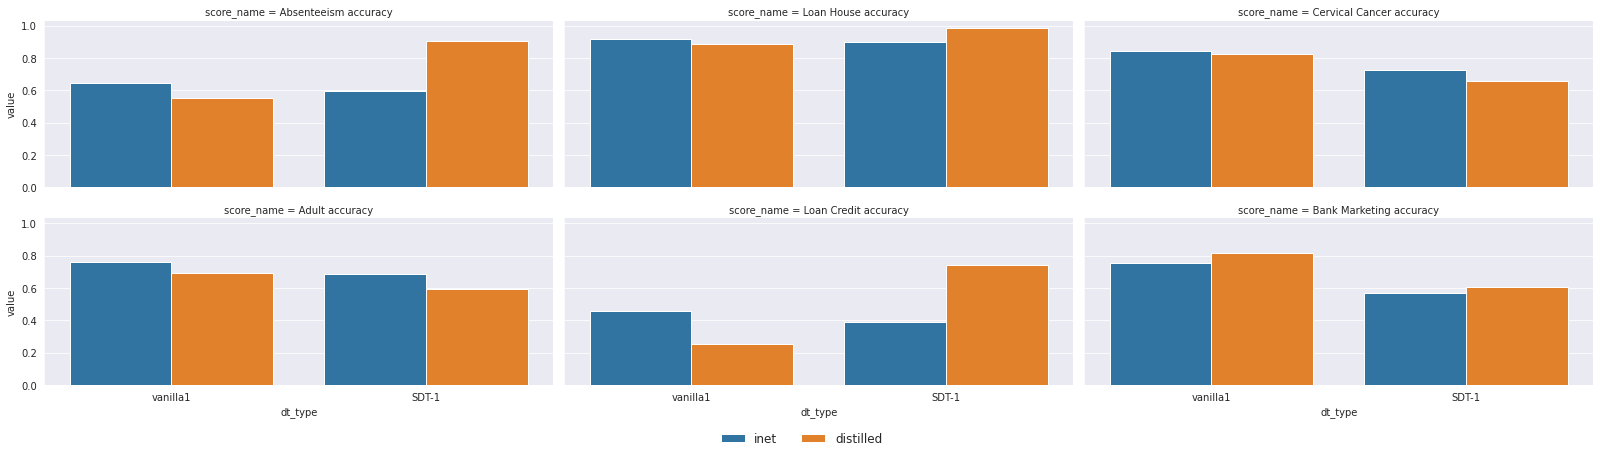

In [25]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_barplot.pdf', bbox_inches = 'tight', pad_inches = 0)


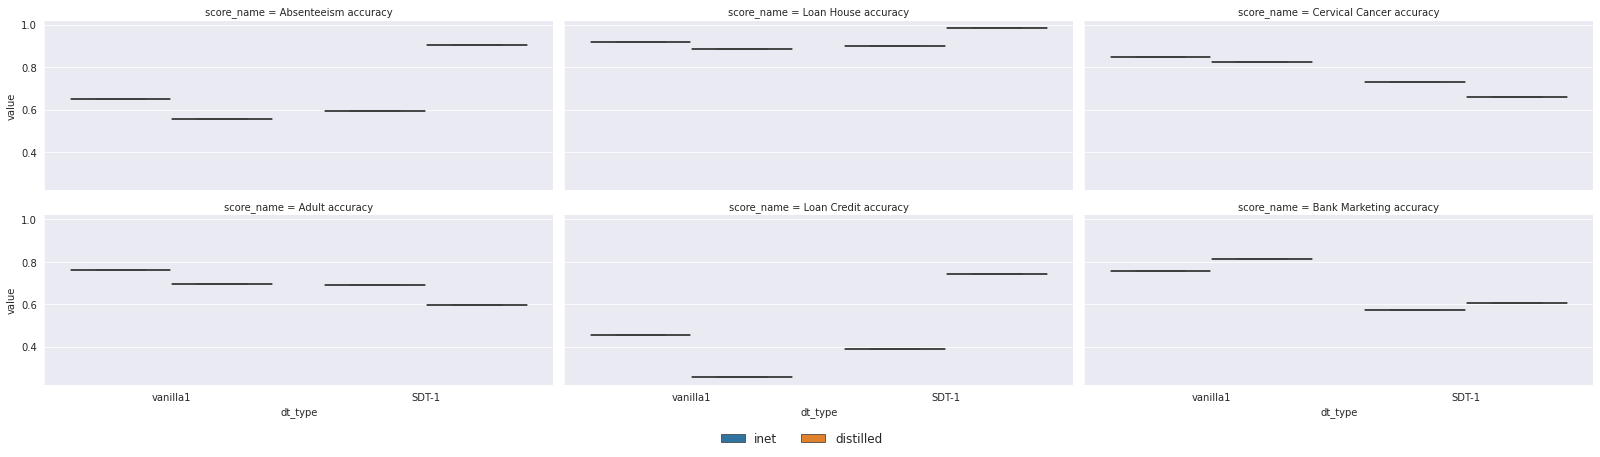

In [26]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'technique', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_boxplot.pdf', bbox_inches = 'tight', pad_inches = 0)


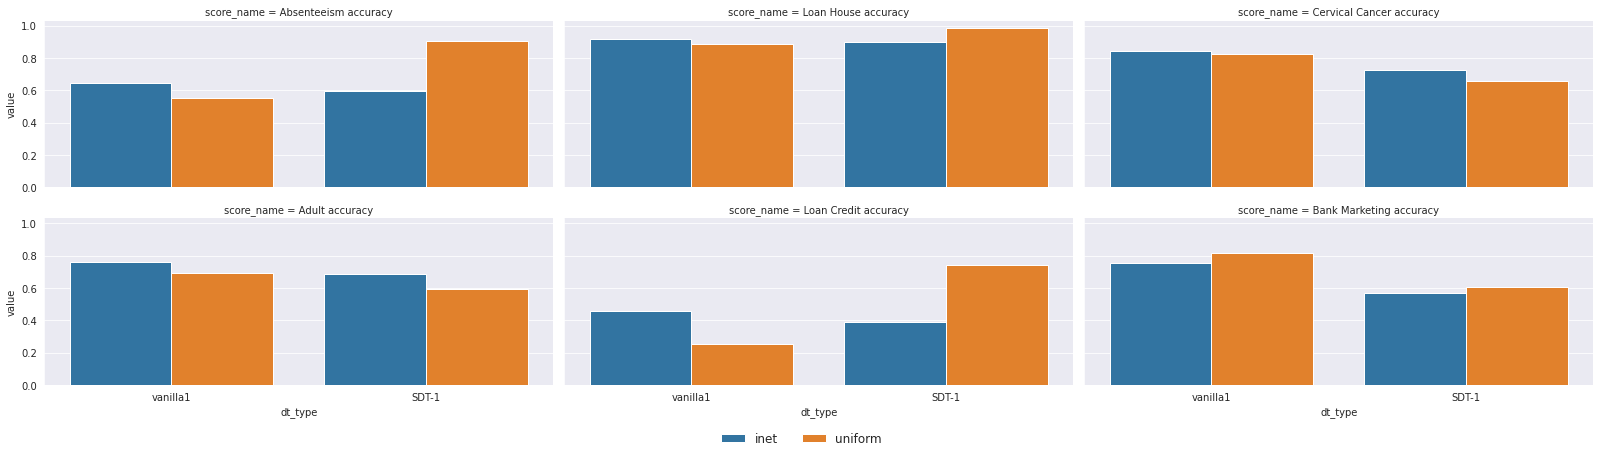

In [27]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.barplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_by_distrib_barplot.pdf', bbox_inches = 'tight', pad_inches = 0)


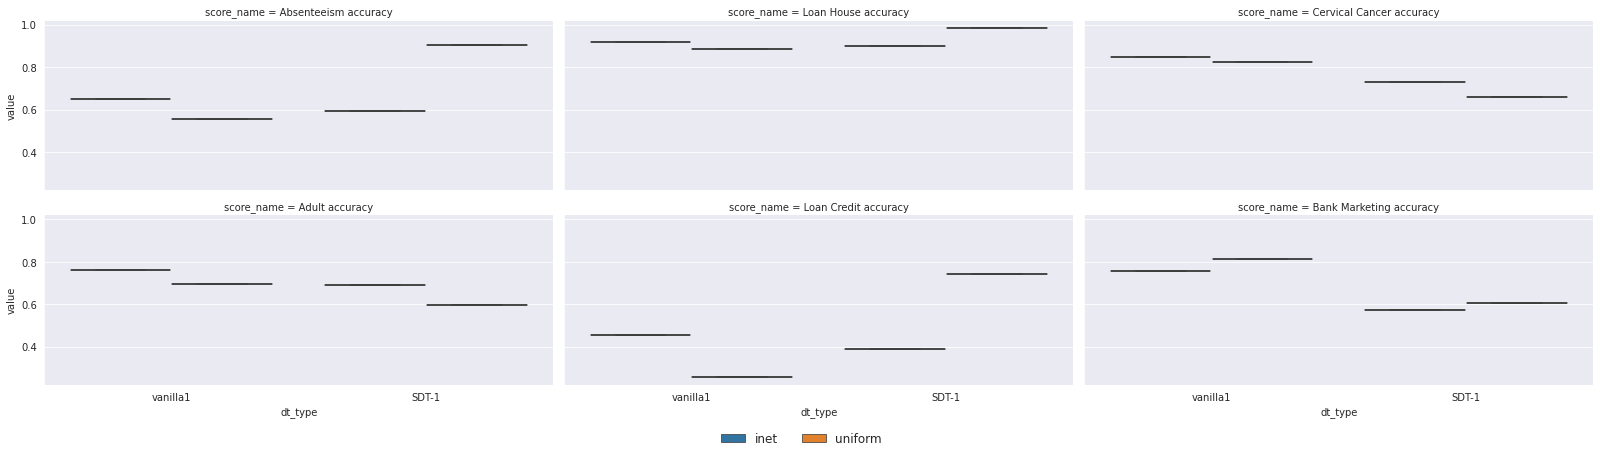

In [28]:
plot = plot_results(data_reduced=real_world_scores_df_distrib_adjusted_plotting, 
                    col = 'score_name', 
                    x = 'dt_type', 
                    y = 'value', 
                    hue = 'distrib', 
                    plot_type = sns.boxplot, 
                    aspect = 2.5, 
                    col_wrap = 3)

plt.savefig('./evaluation_results/real_workd_complete_by_technique_by_distrib_boxplot.pdf', bbox_inches = 'tight', pad_inches = 0)
